# Stephen Lennox

## Research question/interests
### **What is the best place to live in provincial capital cities based the housing index of the last year?**

I am very interested in the current housing markets in Canada. I am currently enrolled in the co-op program and due to a general lack of success on my remote/local job hunt, I am forced to look outside of the province at on-site positions to fufill my co-op graduation requirements. That means that in other provinces like Alberta, Quebec and Ontario: I need to know what the status of housing is and where in order to make informed financial choices on where I potentially move to. My research question is: **What is the best place to live in provincial capital cities based off of the housing index and quality of the housing market in the last year?**

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplt

In [2]:
def load_and_process(url):
    df = (pd.read_csv(url)
    .dropna(subset="VALUE")
      .rename(columns={'GEO':'LOCATION', 'REF_DATE':'DATE', 'New housing price indexes': 'House/land'})
    .drop(columns=["DGUID", "UOM", "UOM_ID", "SCALAR_ID","SCALAR_FACTOR", "COORDINATE", 'TERMINATED', 'SYMBOL', 'STATUS', 'DECIMALS', 'VECTOR'])
     .loc[lambda x: x['House/land'].str.contains('House only')]
      .drop(columns=['House/land'])
      .assign(St_JOHNS = lambda x: x.VALUE.where(x.LOCATION.str.contains("St. John's")), 
              QUEBEC = lambda x: x.VALUE.where(x.LOCATION.str.contains("Quebec")),
              OTTAWA = lambda x: x.VALUE.where(x.LOCATION.str.contains("Ottawa")),
              VICTORIA = lambda x: x.VALUE.where(x.LOCATION.str.contains("Victoria")),
              REGINA = lambda x: x.VALUE.where(x.LOCATION.str.contains("Regina")),
              EDMONTON = lambda x: x.VALUE.where(x.LOCATION.str.contains("Edmonton")),
              HALIFAX = lambda x: x.VALUE.where(x.LOCATION.str.contains("Halifax")),
              WINNIPEG = lambda x: x.VALUE.where(x.LOCATION.str.contains("Winnipeg")),
             )
      .drop(columns='VALUE')
      .groupby('DATE')[['St_JOHNS', 'QUEBEC', 'OTTAWA', 'VICTORIA', 'REGINA', 'EDMONTON', 'HALIFAX', 'WINNIPEG']].first().reset_index()
     )
    return df

In [3]:
df_index=load_and_process('../data/raw/Montly Data/Montly-index.csv')
df_quality = pd.read_csv("../data/raw/Quality Long-Form Data/Housing-quality.csv")

### Get all of the major capital cities' data

In [22]:
df_index
custom_palette = sns.color_palette("coolwarm", 8)
sns.set_palette(custom_palette)

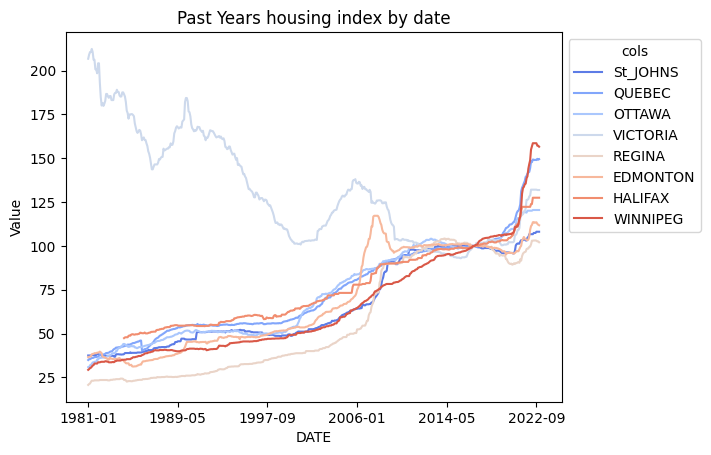

In [24]:
dfm = df_index.melt('DATE', var_name='cols', value_name='vals')
plt=sns.lineplot(x="DATE", y="vals", hue='cols', data=dfm)
plt.set(title="Past Years housing index by date",xlabel='DATE', ylabel='Value', xticks=np.arange(0,503,100))
sns.move_legend(plt, "upper left", bbox_to_anchor=(1, 1))

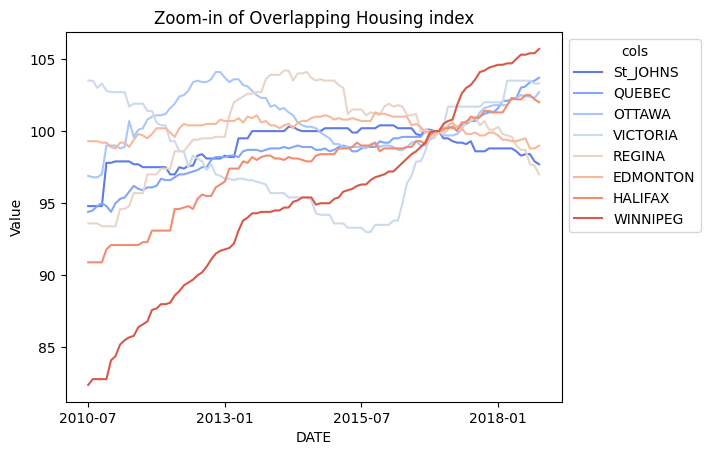

In [46]:
dfm = df_index[-150:-50].melt('DATE', var_name='cols', value_name='vals')
plt=sns.lineplot(x="DATE", y="vals", hue='cols', data=dfm)
plt.set(title="Zoom-in of Overlapping Housing index",xlabel='DATE', ylabel='Value', xticks=np.arange(0,110,30))
sns.move_legend(plt, "upper left", bbox_to_anchor=(1, 1))

### Exploratory Data from the last 12 months

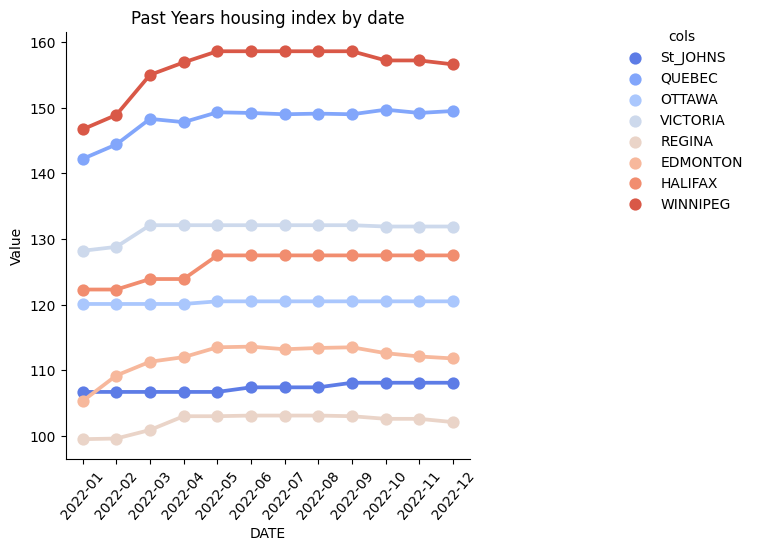

In [14]:
dfm = df_index[-12:].melt('DATE', var_name='cols', value_name='vals')
custom_palette = sns.color_palette("husl", 8)
plt=sns.catplot(x="DATE", y="vals", hue='cols', data=dfm, kind='point')
plt.set(title="Past Years housing index by date",xlabel='DATE', ylabel='Value')
plt.tick_params(axis='x', rotation=50)
sns.move_legend(plt, "upper left", bbox_to_anchor=(1, 1))

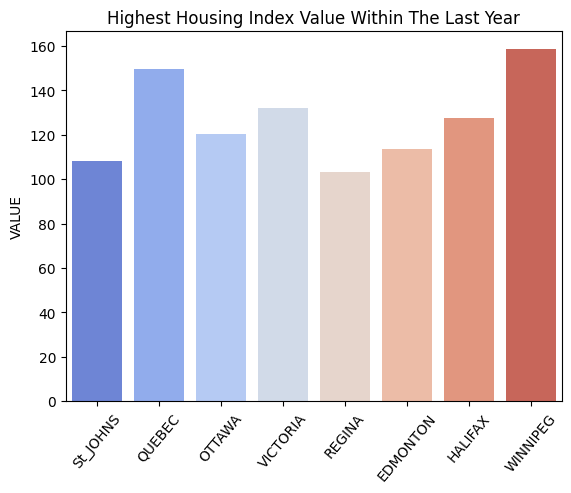

In [49]:
dfm = pd.DataFrame(df_index[-12:].drop(columns=['DATE']).max())
dfm.reset_index()
dfm.columns=['VALUE']
plt=sns.barplot(data=dfm, x=dfm.index, y='VALUE')
plt.set(title='Highest Housing Index Value Within The Last Year')
plt.tick_params(axis='x', rotation=50)

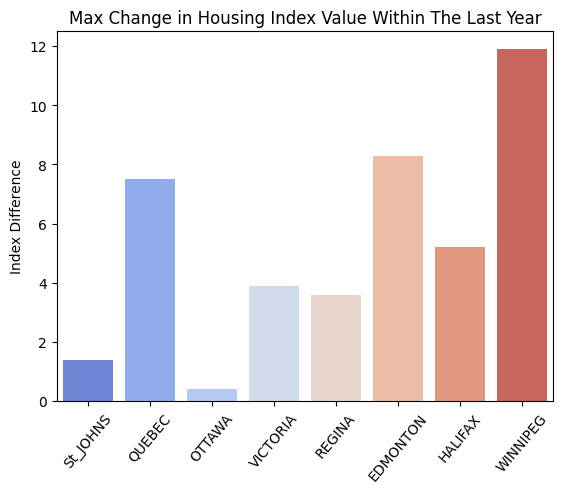

In [50]:
dfl = pd.DataFrame(df_index[-12:].drop(columns=['DATE']).min())
dfl.reset_index()
dfl.columns=['VALUE_LOW']
columns=[dfl, dfm]
tst=pd.concat(columns, axis=1)
tst['CALCULATED_DIFF']=tst['VALUE']-tst['VALUE_LOW'] 
plt=sns.barplot(data=tst, x=tst.index, y='CALCULATED_DIFF')
plt.set(title='Max Change in Housing Index Value Within The Last Year', ylabel='Index Difference')
plt.tick_params(axis='x', rotation=50)

### Explore the second dataset

#### Data Cleaning

In [9]:
data_explore2 =df_quality.drop(columns=["DGUID", "Symbol.17", "Symbol.16", "Symbol.18", "Symbol.19", "Symbol.15", "Symbol.14", "Symbol.13", "Symbol.12", "Symbol.11", "Symbol.10", "Symbol.9", "Symbol.8", "Symbol.7", "Symbol.6", "Symbol.5", "Symbol.4", "Symbol.3", "Symbol.2", "Symbol.1", "Symbol"])
colnames= [item for item in data_explore2.columns if "Non-response rate" in item]
colnames.append("GEO")
data_explore2["GEO"]
filtered=data_explore2[colnames]
f1= filtered.loc[lambda x: x['GEO'].str.contains('Victoria (CMA)', regex=False)].reset_index(drop=True)
f1.loc[0,'GEO']='VICTORIA'
f2= filtered.loc[lambda x: x['GEO'].str.contains('Ottawa - Gatineau', regex=False)].reset_index(drop=True)
f2.loc[0,'GEO']='OTTAWA'
f3=filtered.loc[lambda x: x['GEO'].str.contains("St. John's (CMA)", regex=False)].reset_index(drop=True)
f3.loc[0,'GEO']='ST_JOHNS'
f4=filtered.loc[lambda x: x['GEO'].str.contains('Regina (CMA)', regex=False)].reset_index(drop=True)
f4.loc[0,'GEO']='REGINA'
f5=filtered.loc[lambda x: x['GEO'].str.contains('Edmonton (CMA)', regex=False)].reset_index(drop=True)
f5.loc[0,'GEO']='EDMONTON'
f6=filtered.loc[lambda x: x['GEO'].str.contains('Halifax (CMA)', regex=False)].reset_index(drop=True)
f6.loc[0,'GEO']='HALIFAX'
f7=filtered.loc[lambda x: x['GEO'].str.contains('Quebec', regex=False)].reset_index(drop=True)
f7.loc[0,'GEO']='QUEBEC'
f8=filtered.loc[lambda x: x['GEO'].str.contains('Winnipeg (CMA)', regex=False)].reset_index(drop=True)
f8.loc[0,'GEO']='WINNIPEG'
rows=[f1,f2,f3,f4,f5,f6,f7,f8]
df_explore2=pd.concat(rows).reset_index(drop=True)
df_explore2=df_explore2.rename(columns={"Long-form data quality indicators – Housing characteristics (20):Tenure - Non-response rate[1]":"Tenure_NR",
                           "Long-form data quality indicators – Housing characteristics (20):Condominium status - Non-response rate[3]": "Condiminium_NR",
                           "Long-form data quality indicators – Housing characteristics (20):Number of rooms - Non-response rate[5]":"Num_of_Rooms_NR",
                           "Long-form data quality indicators – Housing characteristics (20):Number of bedrooms - Non-response rate[7]":"Num_of_Bedrooms_NR",
                           "Long-form data quality indicators – Housing characteristics (20):Period of construction - Non-response rate[9]":"Construction_Period_NR",
                           "Long-form data quality indicators – Housing characteristics (20):Dwelling condition - Non-response rate[11]":"Dwelling_Conditions_NR",
                           "Long-form data quality indicators – Housing characteristics (20):Rent monthly cash - Non-response rate[13]":"Monthly_Rent_NR",
                           "Long-form data quality indicators – Housing characteristics (20):Monthly mortgage payments - Non-response rate[15]":"Mortgage_Payments_NR",
                           "Long-form data quality indicators – Housing characteristics (20):Value (owner estimated) - Non-response rate[17]":"Owner_estimated_Val_NR",
                           "Long-form data quality indicators – Housing characteristics (20):Monthly use or occupancy payment for dwelling - Non-response rate[19]":"Occupancy_Payment_NR"})
df_explore2=df_explore2.T.rename(columns={0:"VICTORIA", 1:"OTTAWA", 2:"ST_JOHNS", 3:"REGINA", 4:"EDMONTON", 5:"HALIFAX", 6:"QUEBEC", 7:"WINNIPEG"}).drop(index="GEO")
df_explore2

,VICTORIA,OTTAWA,ST_JOHNS,REGINA,EDMONTON,HALIFAX,QUEBEC,WINNIPEG
Tenure_NR,2.3,2.2,2.0,2.4,3.4,2.3,2.7,2.5
Condiminium_NR,2.2,2.1,1.8,2.4,3.3,2.1,2.7,2.3
Num_of_Rooms_NR,2.2,2.1,1.8,2.4,3.3,2.0,2.5,2.4
Num_of_Bedrooms_NR,2.2,2.0,1.7,2.4,3.3,2.0,2.5,2.4
Construction_Period_NR,2.7,2.8,2.4,3.0,4.1,3.2,3.6,3.2
Dwelling_Conditions_NR,2.2,2.1,1.8,2.5,3.3,2.2,2.7,2.4
Monthly_Rent_NR,3.7,4.6,4.1,4.9,6.0,4.2,4.5,4.9
Mortgage_Payments_NR,3.9,3.1,3.2,3.6,5.1,3.3,4.1,3.7
Owner_estimated_Val_NR,4.6,3.7,3.7,4.2,5.9,4.2,5.2,4.4
Occupancy_Payment_NR,47.9,0.0,0.0,0.0,51.7,17.3,47.2,41.7


With the dataset sorted and filtered, the four most significant categories for housing qualitative data that I am interested in is the:

    1. Monthly Rent
    
    2. Dwelling Conditions
    
    3. Tenure
    
    4. Mortgage Payments

Text(0.5, 1.08, 'The Non-Response Rates By Capital City')

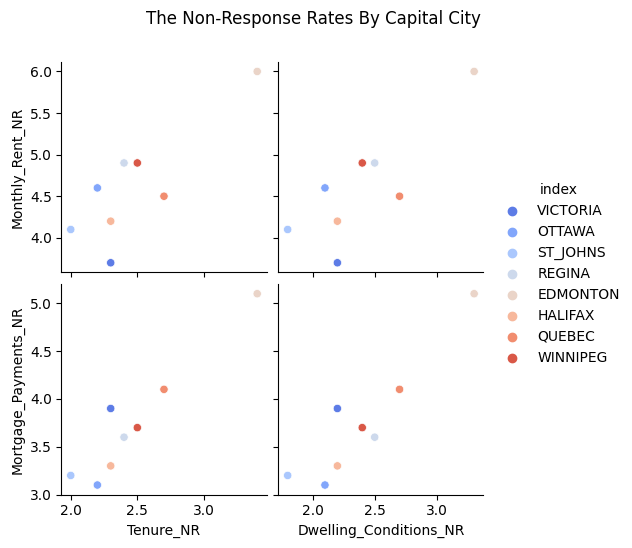

In [16]:
df_graph=df_explore2.T.reset_index()
custom_palette = sns.color_palette("coolwarm", 8)
sns.set_palette(custom_palette)
plot=sns.pairplot(
    df_graph,
    x_vars=["Tenure_NR", "Dwelling_Conditions_NR"],
    y_vars=["Monthly_Rent_NR", "Mortgage_Payments_NR"],
    hue='index',
    kind='scatter'
)
plot.fig.suptitle("The Non-Response Rates By Capital City", y=1.08)

### Convert to CSV Files

In [11]:
import os
import sys
script_dir = os.getcwd()
print(script_dir)
csv_path = os.path.join(script_dir, "..\data\processed\stephen")
indx_path=csv_path+"_index.csv"
qult_path=csv_path+"_quality.csv"

D:\DATA301\project-group-group-2\analysis


In [12]:
df_index.to_csv(indx_path)
df_explore2.to_csv(qult_path)

## Conclusion

Currently Regina is by far the cheapest capital city to live in based on the housing index while St John's has the lowest non response rates for important qualitative factors currently. An interesting observation currently is that Edmontion ranks for third lowest housing index but has the highest non-response rate for: tenure, dwelling conditions, mortgage payments and monthly rent qualitative metrics. In contrast to Edmonton, Winnipeg ranks highest on the yearly housing index and ranks: 3rd for tenure, 4th for dwelling conditions, 2nd for monthly rent and 4th for mortgage. So while Winnipeg ranks highly for both qualitative non-response rates and highest for housing index, Edmonton ranks highest for qualitative non-response rates and 3rd lowest for housing index. Seemingly there is not a strong correlation between the 2 datasets but do provide good insight into different housing metrics

One interesting fact to note is that Victoria while ranking third highest in terms of housing index currently, it is the only province to have dropped in index price since 1980. So unlike Regina which has increased in housing index by a factor 400%: *20.7-102.1* Victoria is currently only 64% of its value in 1980: *206.8-131.9*